# wind scenarios

1. Normal wind speed model + Normal turbulence model;
2. Normal wind speed model + extreme turbulence model;
3. extreme wind speed model + normal turbulence model;

In [1]:
import numpy as np
from wind_load import Wind_load
from params import Params
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
params = Params()

## Normal wind conditions

In [ ]:
wl_nn = Wind_load(time=200, hyperparameters=params, V_hub=8.6, fs=5) 

In [ ]:
# mean and sigma for a i.i.d Gaussian distribution

mean, sigma = wl_nn.get_wind_speed_z(wind_model='normal', turbulence_model='normal')

In [ ]:
# mean

In [ ]:
# for each height, there is a i.i.d Gaussian process 

In [ ]:
ts_winds_z = wl_nn.get_wind_speed_series(mean, sigma)

In [ ]:
ts_winds_z.shape

In [ ]:
wl_nn.plot_wind_speed_series(ts=ts_winds_z, node_index=-1)

In [ ]:
wind_loads = wl_nn.get_wind_loads(wind_speed_series=ts_winds_z)

In [ ]:
wind_loads.shape

In [ ]:
wl_nn.plot_wind_loads(wind_loads=wind_loads, node_index=-1)

In [ ]:
wl_nn.save_wind_load_series(wind_loads)

## 6.2 scenario - `Extreme wind speed` + `Normal turbulence wind` = EN

In [4]:
# In the event of NTM case, Merhad said V_hub = 0.7 * V_ref

wl_EN = Wind_load(time=100, hyperparameters=params, V_hub=params.V_ref, fs=1000) 

In [5]:
# mean and sigma for a i.i.d Gaussian distribution

mean, sigma = wl_EN.get_wind_speed_z(wind_model='extreme', turbulence_model='normal')

In [6]:
# the wind speed time series at height z

ts_winds_z = wl_EN.get_wind_speed_series(mean, sigma)

In [7]:
ts_winds_z.shape

(11, 100000)

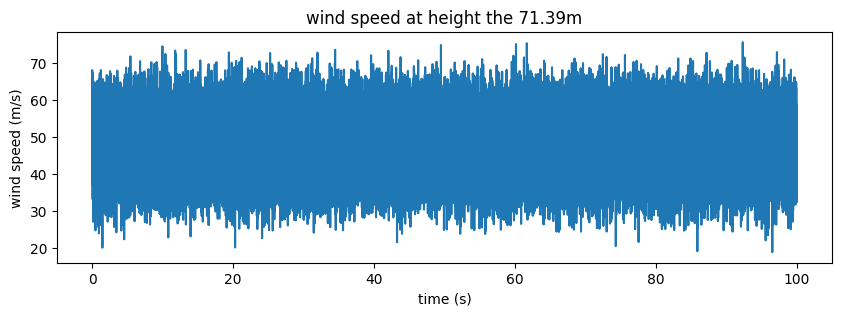

In [8]:
# plot the wind speed series at the highest node

wl_EN.plot_wind_speed_series(ts_winds_z, node_index=-1)

In [9]:
# previous ways of computing drag force `f`

ft = wl_EN.cp_dragforce_f(wind_speed_series=ts_winds_z)

In [10]:
ft.shape

(11, 100000)

In [11]:
# new way of computing summed drag force `F`
F = wl_EN.get_wind_loads_F(wind_speed_series=ts_winds_z)

In [12]:
F.shape

(11, 100000)

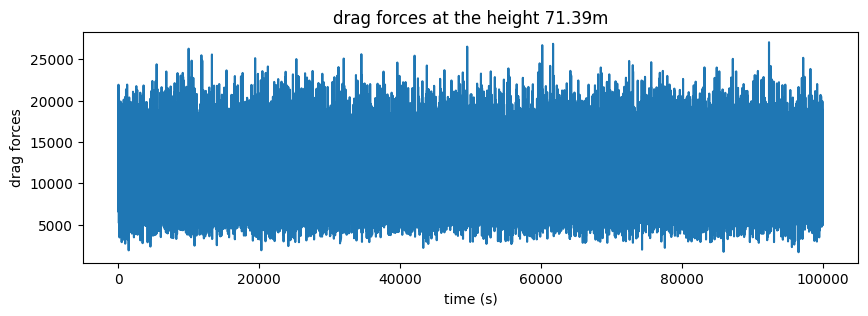

In [13]:
# plot the wind loads F, ignore the ylabel

wl_EN.plot_wind_loads(wind_loads=F, node_index=-1)

In [14]:
wl_EN.save_wind_load_series(ts=np.transpose(F), name='frag_force_F')

In [15]:
# moments = wl_EN.compute_moments(ft=ft)

In [ ]:
# moments.shape

In [ ]:
# # plot the moments, ignore the ylabel

# wl_EN.plot_wind_loads(wind_loads=moments, node_index=-1)

In [ ]:
wl_EN.save_wind_load_series(ts=moments, name='moment_test')